<a href="https://colab.research.google.com/github/fahtom94/HW_0210/blob/main/HW_0210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q -U kaggle_environments

     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 


In [5]:
%%writefile copy_opponent.py

import random


def copy_opponent(observation, configuration):
    # in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    # initial step
    else:
        return random.randrange(0, configuration.signs)


Writing copy_opponent.py


In [6]:
%%writefile paper_agent.py

def paper_agent(observation, configuration):
    return 1


Writing paper_agent.py


In [7]:
%%writefile random_agent.py

import random


def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)




Writing random_agent.py


In [8]:
%%writefile random_agent_repeat_action_if_won.py

import random


def random_agent_repeat_action_if_won(observation, configuration):
    observation.step
    return random.randrange(0, configuration.signs)

Writing random_agent_repeat_action_if_won.py


In [10]:
%%writefile repeat_action_if_equal_last_lap_agent.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None


def repeat_action_if_equal_last_lap_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) == 0:
        pass
    else:
        last_react_action = random.randrange(0, configuration.signs)

    return last_react_action


Writing repeat_action_if_equal_last_lap_agent.py


In [11]:
%%writefile repeat_action_if_lose_last_lap_agent.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None
def repeat_action_if_lose_last_lap_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) == -1:
        pass
    else:
        last_react_action = random.randrange(0, configuration.signs)

    return last_react_action


Writing repeat_action_if_lose_last_lap_agent.py


In [12]:
%%writefile repeat_action_if_won_last_lap_agent.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None


def repeat_action_if_won_last_lap_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) == 1:
        pass
    else:
        last_react_action = random.randrange(0, configuration.signs)

    return last_react_action


Writing repeat_action_if_won_last_lap_agent.py


In [13]:
%%writefile rock_agent.py

def rock_agent(observation, configuration):
    return 0



Writing rock_agent.py


In [14]:
%%writefile scissors_agent.py


def scissors_agent(observation, configuration):
    return 2


Writing scissors_agent.py


In [15]:
%%writefile linear_agent.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None


def linear_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= -1:
        last_react_action = (last_react_action + 1) % 3
    return last_react_action


Writing linear_agent.py


In [16]:
%%writefile statistical.py

action_histogram = {}


def statistical(observation, configuration):
    global action_histogram
    if observation.step == 0:
        action_histogram = {}
        return
    action = observation.lastOpponentAction
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None
    mode_action_count = None
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs


Writing statistical.py


In [17]:
%%writefile linear_won_agent.py

import random
from kaggle_environments.envs.rps.utils import get_score

last_react_action = None


def linear_won_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) == 1:
        last_react_action = (last_react_action + 1) % 3
    return last_react_action


Writing linear_won_agent.py


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Simulation of battles. It can take some time...












All Results: {} {'copy_opponent': -306, 'linear_agent': 2764, 'linear_won_agent': -4267, 'paper_agent': -998, 'random_agent': 63, 'random_agent_repeat_action_if_won': -66, 'repeat_action_if_equal_last_lap_agent': -184, 'repeat_action_if_lose_last_lap_agent': -5692, 'repeat_action_if_won_last_lap_agent': 5450, 'rock_agent': 35, 'scissors_agent': -1989, 'statistical': 5190}
The best agent name: repeat_action_if_won_last_lap_agent with score: 5450


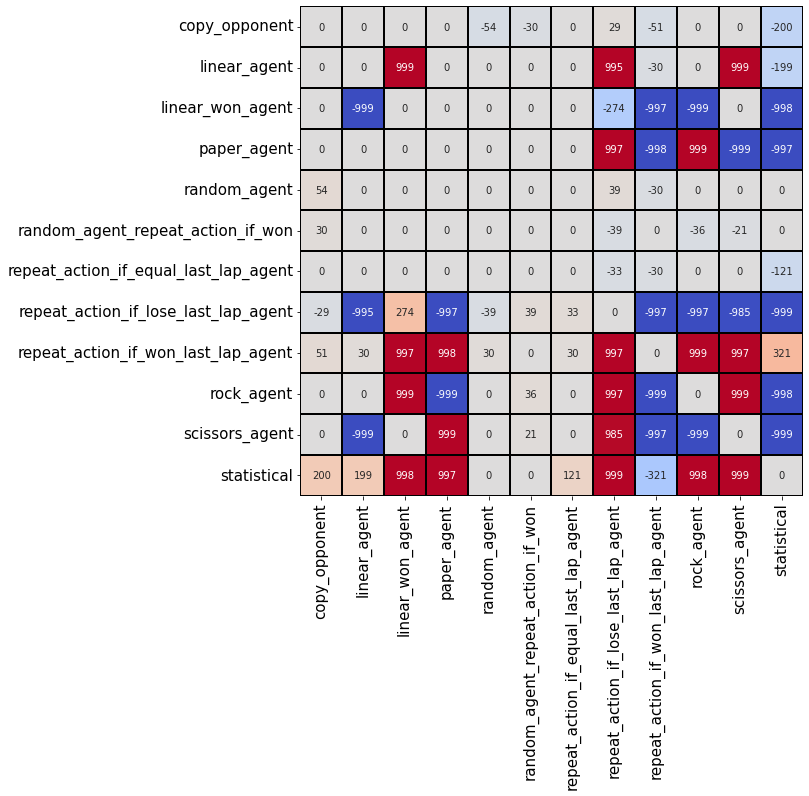

In [20]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import evaluate


list_names = [
    "copy_opponent",
    "linear_agent",
    "linear_won_agent",
    "paper_agent",
    "random_agent",
    "random_agent_repeat_action_if_won",
    "repeat_action_if_equal_last_lap_agent",
    "repeat_action_if_lose_last_lap_agent",
    "repeat_action_if_won_last_lap_agent",
    "rock_agent",
    "scissors_agent",
    "statistical"
]
list_agents = [agent_name + ".py" for agent_name in list_names]

n_agents = len(list_names)

scores = np.zeros((n_agents, n_agents), dtype=np.int)

print("Simulation of battles. It can take some time...")

for idx_agent_1 in range(len(list_names)):
    for idx_agent_2 in range(idx_agent_1 + 1, len(list_names)):
        print(
            f"LOG: {list_names[idx_agent_1]} vs {list_names[idx_agent_2]}",
            end="\r"
        )

        current_score = evaluate(
            "rps",
            [list_agents[idx_agent_1], list_agents[idx_agent_2]],
            configuration={"episodeSteps": 1000}
        )

        scores[idx_agent_1, idx_agent_2] = current_score[0][0]
        scores[idx_agent_2, idx_agent_1] = current_score[0][1]

    print()

results = {}
for idx_agent_1 in range(len(list_names)):
    win_result = 0
    for idx_agent_2 in range(len(list_names)):
        win_result += scores[idx_agent_1][idx_agent_2]
    results[list_names[idx_agent_1]] = win_result

print("All Results: {}", results)

key_max_val = None
max_val = None
for key, value in results.items():
    if max_val is None:
        max_val = value
        key_max_val = key
    elif value > max_val:
        max_val = value
        key_max_val = key

print("The best agent name: {} with score: {}".format(key_max_val, max_val))


df_scores = pd.DataFrame(
    scores, 
    index=list_names, 
    columns=list_names,
)


plt.figure(figsize=(9, 9))
sns.heatmap(
    df_scores, annot=True, cbar=False, 
    cmap='coolwarm', linewidths=1, 
    linecolor='black', fmt="d",
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15);
